In [6]:
import pandas as pd
from pprint import pprint
from sklearn.linear_model import LogisticRegression # algorithm
from sklearn.preprocessing import StandardScaler # dataset feature value scale down
from sklearn.model_selection import train_test_split # data split for train and test purpose
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer # load Data set
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset=load_breast_cancer()


In [8]:
pprint(dataset.DESCR)

('.. _breast_cancer_dataset:\n'
 '\n'
 'Breast cancer wisconsin (diagnostic) dataset\n'
 '--------------------------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 ':Number of Instances: 569\n'
 '\n'
 ':Number of Attributes: 30 numeric, predictive attributes and the class\n'
 '\n'
 ':Attribute Information:\n'
 '    - radius (mean of distances from center to points on the perimeter)\n'
 '    - texture (standard deviation of gray-scale values)\n'
 '    - perimeter\n'
 '    - area\n'
 '    - smoothness (local variation in radius lengths)\n'
 '    - compactness (perimeter^2 / area - 1.0)\n'
 '    - concavity (severity of concave portions of the contour)\n'
 '    - concave points (number of concave portions of the contour)\n'
 '    - symmetry\n'
 '    - fractal dimension ("coastline approximation" - 1)\n'
 '\n'
 '    The mean, standard error, and "worst" or largest (mean of the three\n'
 '    worst/largest values) of these features were computed for each image,\n'
 '  

In [9]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
dataset.frame

In [11]:
pprint(dataset)

{'DESCR': '.. _breast_cancer_dataset:\n'
          '\n'
          'Breast cancer wisconsin (diagnostic) dataset\n'
          '--------------------------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          ':Number of Instances: 569\n'
          '\n'
          ':Number of Attributes: 30 numeric, predictive attributes and the '
          'class\n'
          '\n'
          ':Attribute Information:\n'
          '    - radius (mean of distances from center to points on the '
          'perimeter)\n'
          '    - texture (standard deviation of gray-scale values)\n'
          '    - perimeter\n'
          '    - area\n'
          '    - smoothness (local variation in radius lengths)\n'
          '    - compactness (perimeter^2 / area - 1.0)\n'
          '    - concavity (severity of concave portions of the contour)\n'
          '    - concave points (number of concave portions of the contour)\n'
          '    - symmetry\n'
          ' 

In [12]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
data=pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [14]:
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
data["target"]=dataset.target

In [16]:
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
X=data.iloc[:, :-1]
Y=data.iloc[:,-1]

In [20]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [21]:
Y_Predict=classifier.predict(X)

In [22]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [23]:
classifier.coef_[0]

array([ 1.84610567,  0.11970952, -0.0267846 , -0.00263668, -0.23230872,
       -0.27172365, -0.67441345, -0.47567528, -0.30879068,  0.0027958 ,
       -0.03245587,  1.13337491,  0.28947112, -0.1134471 , -0.03275884,
        0.18340108,  0.10024746, -0.05303751, -0.02347515,  0.03402617,
        0.93055911, -0.34158046, -0.17709827, -0.01726956, -0.44994764,
       -0.51831345, -1.38601719, -0.90735761, -0.80136104, -0.03229598])

In [24]:
coefficient=pd.Series(classifier.coef_[0],index=X.columns)

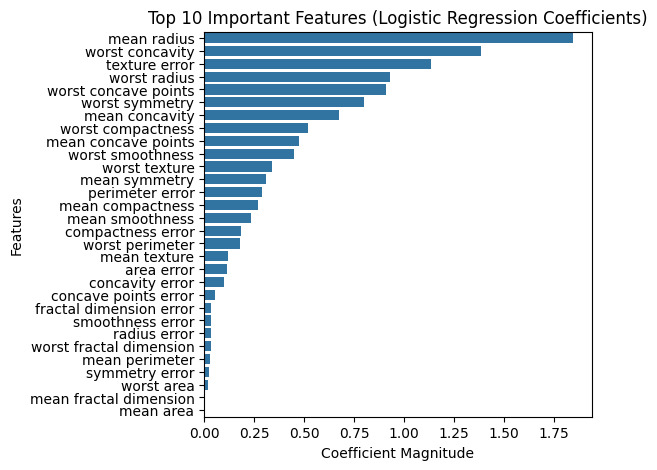

In [25]:
top_features = coefficient.abs().sort_values(ascending=False)

# Plot
plt.figure(figsize=(5,5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.show()

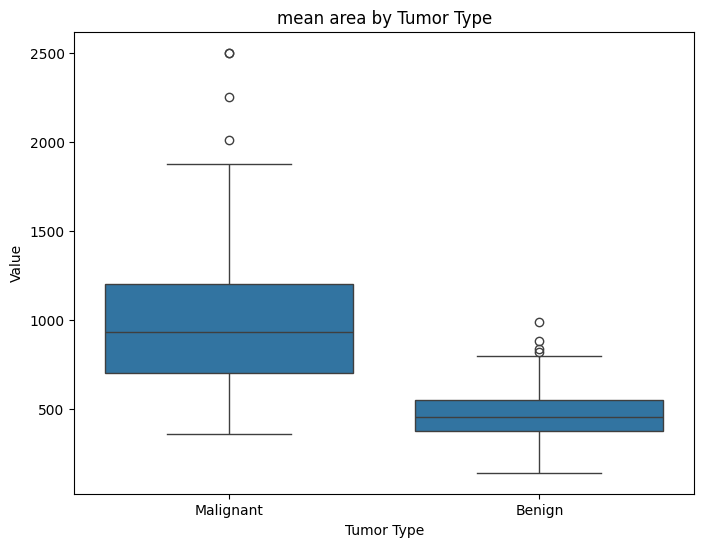

In [26]:
feature = "mean area"

plt.figure(figsize=(8,6))
sns.boxplot(x="target", y=feature, data=data)
plt.xticks([0, 1], ["Malignant", "Benign"])
plt.title(f"{feature} by Tumor Type")
plt.ylabel("Value")
plt.xlabel("Tumor Type")
plt.show()

In [27]:
# normal train model without data split and scale down features value
acc=accuracy_score(Y, Y_Predict)
acc

0.961335676625659

In [28]:
conf_matrix=confusion_matrix(Y, Y_Predict)
conf_matrix

array([[199,  13],
       [  9, 348]])

In [29]:

pprint(classification_report(Y, Y_Predict))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.96      0.94      0.95       212\n'
 '           1       0.96      0.97      0.97       357\n'
 '\n'
 '    accuracy                           0.96       569\n'
 '   macro avg       0.96      0.96      0.96       569\n'
 'weighted avg       0.96      0.96      0.96       569\n')


### Optimize way

In [30]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.30, random_state=48)

In [31]:
scaler=StandardScaler()
X_Scale_train_val=scaler.fit_transform(x_train)
X_Scale_test_val=scaler.transform(x_test)

In [32]:
model=LogisticRegression()
model.fit(X_Scale_train_val, y_train)

LogisticRegression()

In [33]:
y_pred=model.predict(X_Scale_test_val)

In [34]:
# calculate accuracy score
accuracy_score(y_test, y_pred)

0.9824561403508771

In [35]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [36]:
pd.Series(y_pred)

,0
0,1
1,0
2,0
3,0
4,1
...,...
166,1
167,1
168,1
169,1


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.98      0.99      0.98        95

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [38]:
print(confusion_matrix(y_test, y_pred))

[[74  2]
 [ 1 94]]


In [39]:
# performe cross validation
from sklearn.model_selection import cross_val_score
crossValModel=cross_val_score(LogisticRegression(), X,Y, cv=5)
crossValModel.mean()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

np.float64(0.9437820214252446)

In [40]:
print(crossValModel[0])
print(crossValModel[1])
print(crossValModel[2])
print(crossValModel[3])
print(crossValModel[4])
print("Average",crossValModel.mean())

0.9298245614035088
0.9385964912280702
0.9649122807017544
0.9298245614035088
0.9557522123893806
Average 0.9437820214252446


In [41]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])
param_grid = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

grid_search.fit(X_Scale_train_val, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

print("Test Accuracy:", grid_search.score(X_Scale_test_val, y_test))

print(grid_search.best_estimator_)

Best Parameters: {'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best CV Accuracy: 0.9724683544303797
Test Accuracy: 0.9824561403508771
Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(C=1, solver='liblinear'))])


In [42]:
grid_model=grid_search.best_estimator_
grid_model.fit(X_Scale_train_val, y_train)
grid_y_pred=grid_model.predict(X_Scale_test_val)
print(accuracy_score(y_test, grid_y_pred))
print(confusion_matrix(y_test, grid_y_pred))
print(classification_report(y_test, grid_y_pred))

0.9824561403508771
[[74  2]
 [ 1 94]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.98      0.99      0.98        95

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

